In [1]:
# Customer Segmentation – Clustering & Model Development

In [1]:
# ===============================
# IMPORT REQUIRED LIBRARIES
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ===============================
# LOAD CLEANED DATA FROM MEMBER 1
# ===============================

df = pd.read_csv(r"C:\Users\Karna\Downloads\cleaned_data.csv")
df.head()


,promotion,seasonal,sales_volume,price,desc_length,product_position_End-cap,product_position_Front of Store,terms_jeans,terms_shoes,terms_sweaters,...,origin_China,origin_India,origin_Morocco,origin_Pakistan,origin_Portugal,origin_Spain,origin_Turkey,origin_Vietnam,price_category_Low,price_category_Medium
0,0,0,0.488217,1.584274,1.097961,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,1.111902,-1.153063,0.688650,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,0,0,0.236731,1.283167,0.708141,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0.840297,-0.468729,1.273379,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0,0,1.691997,-0.810896,0.103921,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   promotion                        20252 non-null  int64  
 1   seasonal                         20252 non-null  int64  
 2   sales_volume                     20252 non-null  float64
 3   price                            20252 non-null  float64
 4   desc_length                      20250 non-null  float64
 5   product_position_End-cap         20252 non-null  bool   
 6   product_position_Front of Store  20252 non-null  bool   
 7   terms_jeans                      20252 non-null  bool   
 8   terms_shoes                      20252 non-null  bool   
 9   terms_sweaters                   20252 non-null  bool   
 10  terms_t-shirts                   20252 non-null  bool   
 11  section_WOMAN                    20252 non-null  bool   
 12  season_Spring     

,promotion,seasonal,sales_volume,price,desc_length
count,20252.0,20252.0,2.025200e+04,2.025200e+04,2.025000e+04
mean,0.0,0.0,7.999395e-17,-2.203342e-16,-1.403541e-17
std,0.0,0.0,1.000025e+00,1.000025e+00,1.000025e+00
min,0.0,0.0,-1.942815e+00,-1.280948e+00,-2.312959e+00
25%,0.0,0.0,-8.329234e-01,-7.698360e-01,-7.926636e-01
50%,0.0,0.0,-3.601296e-01,-2.565852e-01,-1.302478e-02
75%,0.0,0.0,8.947859e-01,5.132910e-01,6.886502e-01
max,0.0,0.0,2.825361e+00,3.979445e+00,3.514841e+00


In [4]:
# ============================================
# SELECT FEATURES FOR CLUSTERING (UPDATED)
# ============================================

features = [
    "promotion",
    "seasonal",
    "sales_volume",
    "price",
    "desc_length",
    "product_position_End-cap",
    "product_position_Front of Store"
]

X = df[features].copy()
X.head()


,promotion,seasonal,sales_volume,price,desc_length,product_position_End-cap,product_position_Front of Store
0,0,0,0.488217,1.584274,1.097961,False,False
1,0,0,1.111902,-1.153063,0.688650,False,False
2,0,0,0.236731,1.283167,0.708141,True,False
3,0,0,0.840297,-0.468729,1.273379,False,False
4,0,0,1.691997,-0.810896,0.103921,True,False


In [5]:
# ===============================
# SCALING
# ===============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 0.        ,  0.        ,  0.48821678,  1.5842743 ,  1.09796058,
        -0.71027774, -0.62211597],
       [ 0.        ,  0.        ,  1.11190225, -1.15306329,  0.68865018,
        -0.71027774, -0.62211597],
       [ 0.        ,  0.        ,  0.2367307 ,  1.28316716,  0.70814115,
         1.40789996, -0.62211597],
       [ 0.        ,  0.        ,  0.84029729, -0.46872889,  1.27337932,
        -0.71027774, -0.62211597],
       [ 0.        ,  0.        ,  1.6919968 , -0.81089609,  0.10392105,
         1.40789996, -0.62211597]])

In [6]:
import numpy as np

# Replace inf with NaN
X = df[features].copy()
X = X.replace([np.inf, -np.inf], np.nan)

#  Fill NaN values with mean (safe for numeric + booleans)
X = X.fillna(X.mean())

#  Convert boolean columns to integers
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

#  Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df.head()


,PC1,PC2
0,0.089356,0.838172
1,0.038495,-1.552249
2,-1.413084,0.784354
3,0.052726,-0.849940
4,-1.457434,-1.749898


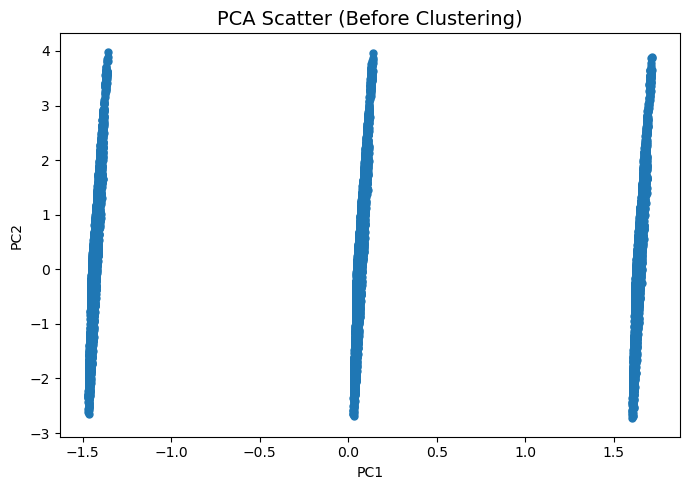

In [7]:
# PCA Scatter (Before Clustering)

plt.figure(figsize=(7,5))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=25)
plt.title("PCA Scatter (Before Clustering)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


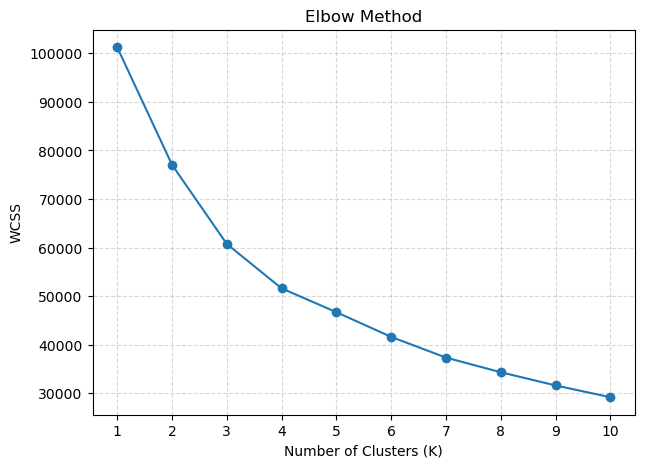

In [8]:
# ===============================
# ELBOW METHOD
# ===============================

wcss = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(K)
plt.show()

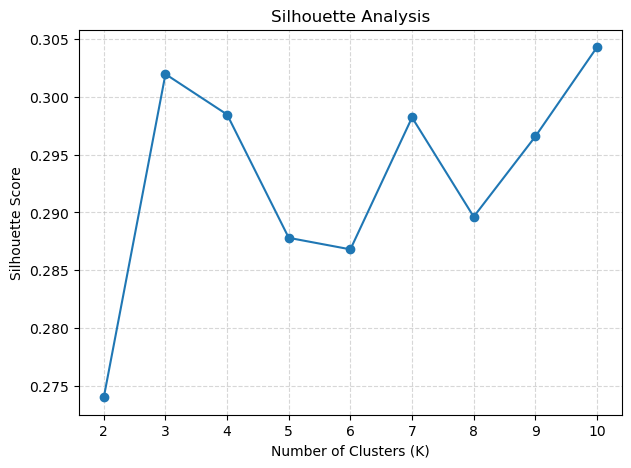

In [11]:
# ===============================
# SILHOUETTE METHOD
# ===============================

silhouette_scores = []
K2 = range(2, 11)

for k in K2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)

plt.figure(figsize=(7,5))
plt.plot(K2, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(K2)
plt.show()


In [12]:
best_k = K2[silhouette_scores.index(max(silhouette_scores))]
best_k


10

In [13]:
# ===============================
# FINAL K-MEANS MODEL
# ===============================

final_k = best_k  

kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = cluster_labels
df.head()
df['Cluster'] = kmeans.labels_
df.head()


,promotion,seasonal,sales_volume,price,desc_length,product_position_End-cap,product_position_Front of Store,terms_jeans,terms_shoes,terms_sweaters,...,origin_India,origin_Morocco,origin_Pakistan,origin_Portugal,origin_Spain,origin_Turkey,origin_Vietnam,price_category_Low,price_category_Medium,Cluster
0,0,0,0.488217,1.584274,1.097961,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5
1,0,0,1.111902,-1.153063,0.688650,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,3
2,0,0,0.236731,1.283167,0.708141,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,4
3,0,0,0.840297,-0.468729,1.273379,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
4,0,0,1.691997,-0.810896,0.103921,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1


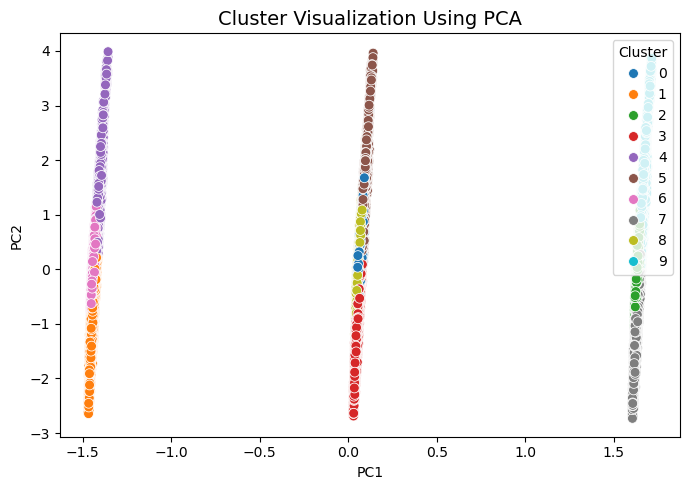

In [15]:
# ===============================
# CLUSTER VISUALIZATION (PCA)
# ===============================

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=pca_df["PC1"],
    y=pca_df["PC2"],
    hue=df["Cluster"],
    palette="tab10",
    s=50
)
plt.title("Cluster Visualization Using PCA", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [14]:
# ================
# FINAL CLUSTER FORMATION
# ================

# Step 1: Choose the best number of clusters (replace k with your optimal cluster number)
k = 4   # example: change to your chosen number based on Elbow/Silhouette

# Step 2: Fit KMeans with final k
final_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

# Step 3: Predict cluster labels
clusters = final_kmeans.predict(X_scaled)

# Step 4: Add cluster labels to original dataframe
df['Cluster'] = clusters

# Step 5: Display sample rows to verify
print(df.head())

# Step 6:  Save clustered data to CSV for further use
df.to_csv("final_clustered_data.csv", index=False)

print("Clustering Completed! File saved as final_clustered_data.csv")


   promotion  seasonal  sales_volume     price  desc_length  \
0          0         0      0.488217  1.584274     1.097961   
1          0         0      1.111902 -1.153063     0.688650   
2          0         0      0.236731  1.283167     0.708141   
3          0         0      0.840297 -0.468729     1.273379   
4          0         0      1.691997 -0.810896     0.103921   

   product_position_End-cap  product_position_Front of Store  terms_jeans  \
0                     False                            False        False   
1                     False                            False        False   
2                      True                            False        False   
3                     False                            False        False   
4                      True                            False        False   

   terms_shoes  terms_sweaters  ...  origin_India  origin_Morocco  \
0        False           False  ...         False           False   
1        False      

In [15]:
# Summary statistics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         promotion  seasonal  sales_volume     price  desc_length  \
Cluster                                                             
0              0.0       0.0     -0.859187  1.856357     0.027383   
1              0.0       0.0      0.155835 -0.386666    -0.007138   
2              0.0       0.0      0.108431 -0.194743    -0.001804   
3              0.0       0.0      0.142684 -0.289939    -0.003694   

         product_position_End-cap  product_position_Front of Store  \
Cluster                                                              
0                        0.300466                         0.159555   
1                        0.000000                         0.000000   
2                        0.000000                         1.000000   
3                        1.000000                         0.000000   

         terms_jeans  terms_shoes  terms_sweaters  ...  origin_China  \
Cluster                                            ...                 
0           0.035497

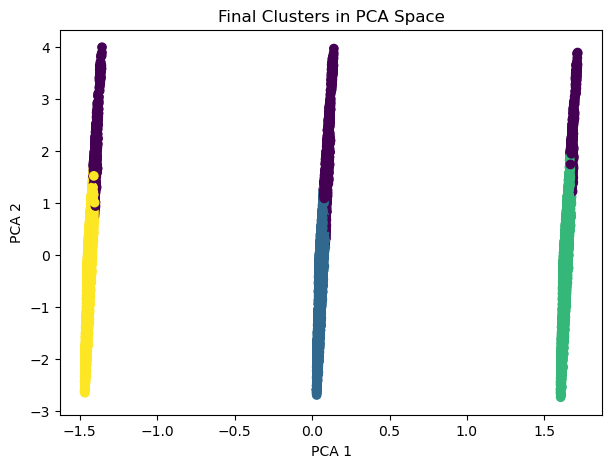

In [16]:
# Visualize Final Clusters (Using PCA)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.title("Final Clusters in PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
